In [126]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [127]:
data = pd.read_csv("../data/pd_speech_features.csv")


In [128]:
X0 = data.drop(columns=["id", "class"])
X1 = StandardScaler().fit_transform(X0)
Y = data["class"]

## Original data

In [129]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y, test_size=0.2, random_state=192 )


In [130]:
model0 = LogisticRegression(penalty=None, max_iter=20000)
model0.fit(X0_train, Y0_train )

LogisticRegression(max_iter=20000, penalty=None)

In [131]:
Y0_predicts = model0.predict(X0_test)


In [132]:
acc = accuracy_score(Y0_test, Y0_predicts)
cm = confusion_matrix(Y0_test, Y0_predicts)

print(acc)
print(cm)

0.7631578947368421
[[  9  28]
 [  8 107]]


## PCA

In [133]:
pca = PCA(n_components=2)
result = pca.fit_transform(X1)
result.shape

(756, 2)

In [134]:
df = pd.DataFrame(result)
df

,0,1
0,-10.034309,1.473187
1,-10.624667,1.585845
2,-13.503155,-1.251541
3,-9.143503,8.834656
4,-6.752753,4.612575
...,...,...
751,22.310814,6.480630
752,13.430632,1.447516
753,8.257256,2.389442
754,3.998611,5.410280


In [135]:
pc1 = -result[: , 0]
pc2 = -result[:, 1]


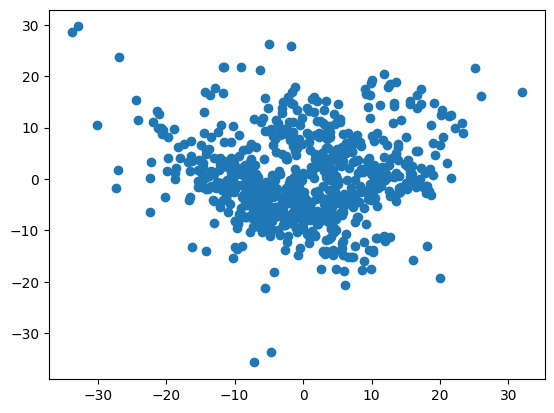

In [136]:
plt.scatter(pc1, pc2)

In [137]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(result, Y, test_size=0.2, random_state=192)


In [138]:
model1 = LogisticRegression(penalty=None, max_iter=20000)
model1.fit(X1_train, Y1_train)

LogisticRegression(max_iter=20000, penalty=None)

In [139]:
Y1_predicts = model1.predict(X1_test)

In [140]:
acc = accuracy_score(Y1_test, Y1_predicts)
cm = confusion_matrix(Y1_test, Y1_predicts)

print(acc)
print(cm)

0.8223684210526315
[[ 16  21]
 [  6 109]]
